In [51]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [20]:
easy = np.load('texts.v2.npz')

In [21]:
easy['texts'].shape

(10015, 19, 57)

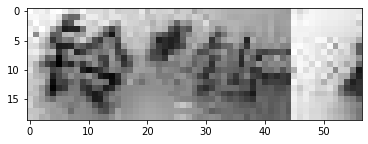

In [43]:
img = easy['texts'][84]

plt.imshow(img, cmap='gray')

In [48]:
print(easy['labels'][85])

[0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [56]:
def cropping_img(img):
    text_img2 = cv2.GaussianBlur(img, (3,3), 1)
    sobelY = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
    edges = cv2.filter2D(text_img2, -1, sobelY)
    _, thres = cv2.threshold(edges, 0, 1, cv2.THRESH_OTSU)
    col_sum = np.sum(thres, axis=0)
    divides = np.argwhere(col_sum > 17).flatten()

    if len(divides) >= 1:
        col = int(round(np.average(divides)))
        res = img[:, :col]
    else:
        res = img
    return res

In [57]:
SAVE_DIR = 'net/untagged_imgs/'

for i, img in enumerate(easy['texts']):
    res = cropping_img(img)
    cv2.imwrite(os.path.join(SAVE_DIR, "%05d.png"%(i)), res)